In [1]:
import pandas as pd

In [29]:
df = pd.read_csv(r'E:\Projects\Healthcare Data\healthcare_dataset.csv')
features = df[['Age', 'Billing Amount']].dropna()
print(df.head())

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

In [30]:
#Predicting length of stay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
X = df[['Age', 'Billing Amount']]
y = (pd.to_datetime(df['Discharge Date']) - pd.to_datetime(df['Date of Admission'])).dt.days

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 7.451882868631615


Missing 'Date of Admission' values: 0


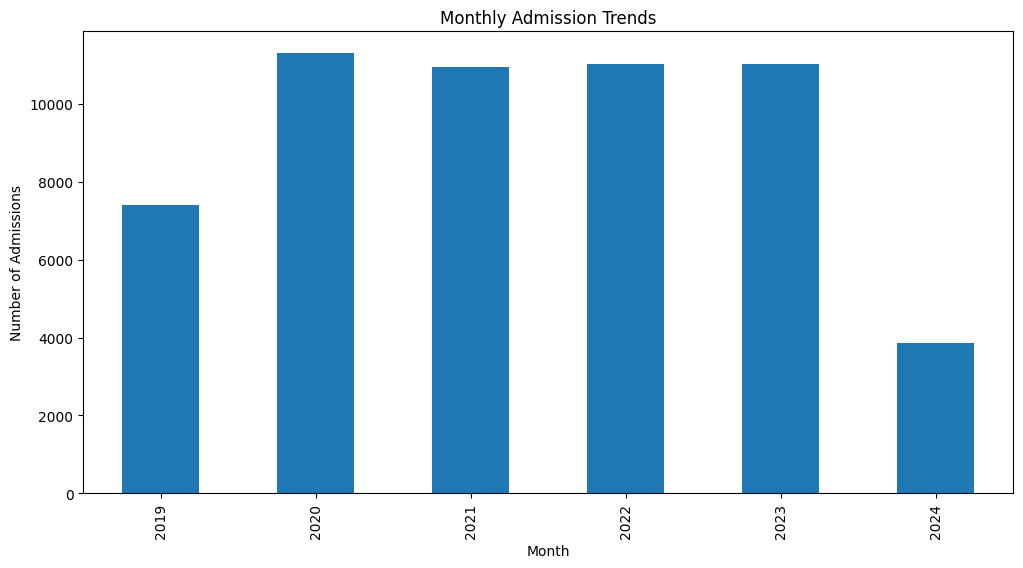

In [45]:
# Admission trends
import matplotlib.pyplot as plt

df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

print(f"Missing 'Date of Admission' values: {df['Date of Admission'].isnull().sum()}")


df['Admission Month'] = df['Date of Admission'].dt.to_period('Y')

admission_trends = df.groupby('Admission Month').size()

# Plot trends
plt.figure(figsize=(12, 6))
admission_trends.plot(kind='bar')
plt.title('Monthly Admission Trends')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.show()


In [47]:
# Group by Insurance Provider and calculate average billing amount
billing_by_provider = df.groupby('Insurance Provider')['Billing Amount'].mean()

billing_by_provider.sort_values(ascending=False).head()


Insurance Provider
Medicare            25615.990508
Blue Cross          25613.011503
Aetna               25553.294506
Cigna               25525.766314
UnitedHealthcare    25389.172390
Name: Billing Amount, dtype: float64

In [53]:
# Medical condition by Gender and age
condition_by_age_gender = df.groupby(['Age', 'Gender', 'Medical Condition']).size().reset_index(name='Count')
condition_by_age_gender.sort_values(by='Count', ascending=False).head(10)

,Age,Gender,Medical Condition,Count
789,79,Female,Hypertension,92
671,69,Male,Arthritis,92
705,72,Female,Hypertension,92
99,21,Male,Hypertension,91
246,34,Female,Asthma,91
311,39,Male,Arthritis,90
287,37,Male,Arthritis,90
590,62,Male,Diabetes,89
478,53,Female,Obesity,88
517,56,Male,Cancer,87


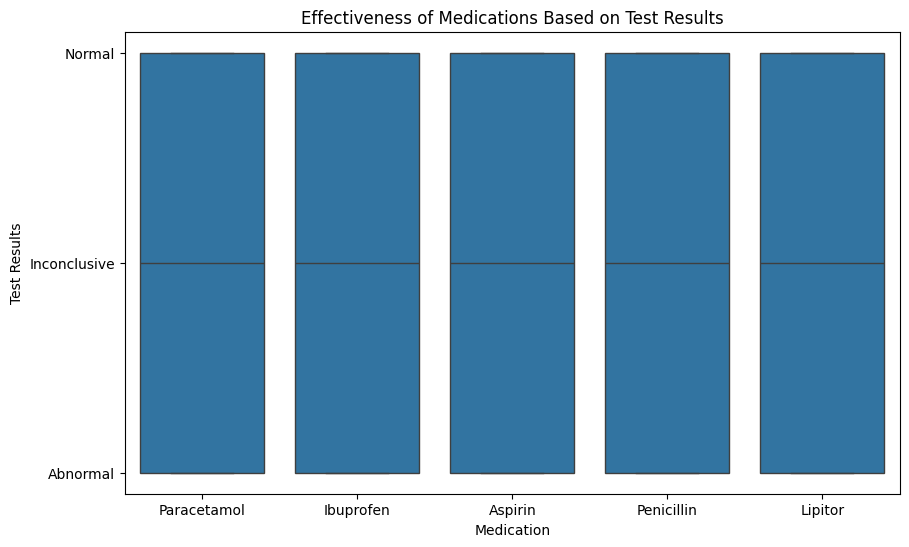

In [57]:
# Medical effective analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medication', y='Test Results', data=df)
plt.title('Effectiveness of Medications Based on Test Results')
plt.xlabel('Medication')
plt.ylabel('Test Results')
plt.show()


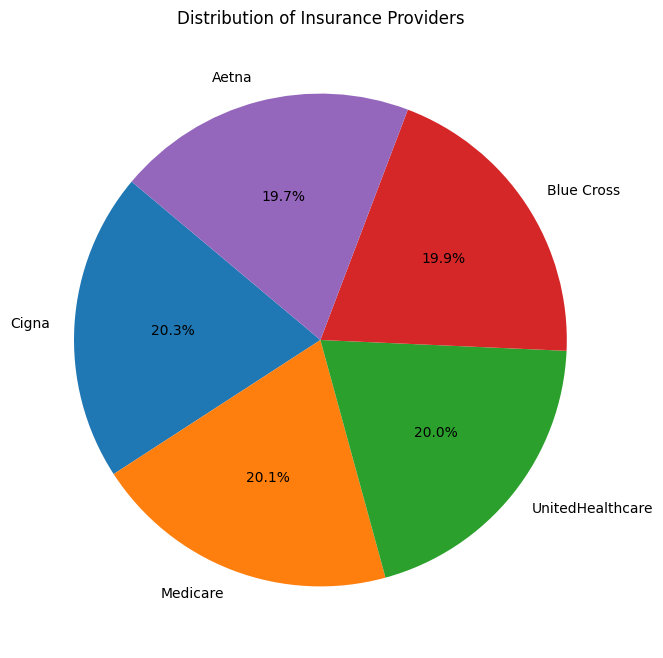

In [58]:
# Understanding Patient Insurance Coverage
insurance_distribution = df['Insurance Provider'].value_counts()

plt.figure(figsize=(8, 8))
insurance_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Insurance Providers')
plt.ylabel('')
plt.show()


In [60]:
# Gender and Blood Type Correlation with Medical Conditions
condition_by_gender_blood = df.groupby(['Gender', 'Blood Type', 'Medical Condition']).size().reset_index(name='Count')
condition_by_gender_blood.sort_values(by='Count', ascending=False).head(10)


,Gender,Blood Type,Medical Condition,Count
64,Male,AB+,Hypertension,630
20,Female,AB-,Cancer,626
72,Male,B+,Arthritis,625
2,Female,A+,Cancer,624
58,Male,A-,Hypertension,622
3,Female,A+,Diabetes,615
40,Female,O+,Hypertension,612
13,Female,AB+,Asthma,612
74,Male,B+,Cancer,610
84,Male,O+,Arthritis,607
